# 4.7 维纳滤波

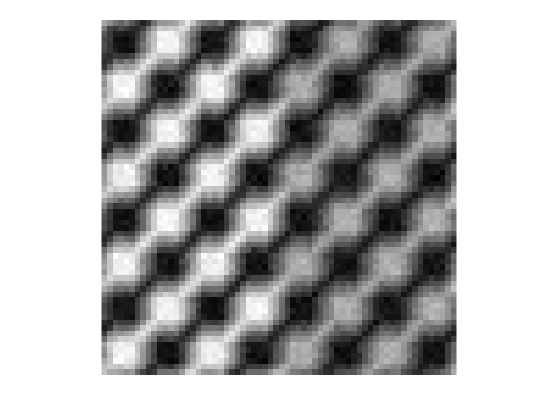

In [11]:
f = checkerboard(8);

PSF = fspecial('motion', 7, 45);
gb = imfilter(f, PSF, 'circular');

noise = imnoise2('Gaussian', size(f, 1), size(f, 2), 0, sqrt(0.001));

g = gb + noise;
imshow(pixeldup(g, 8), []);

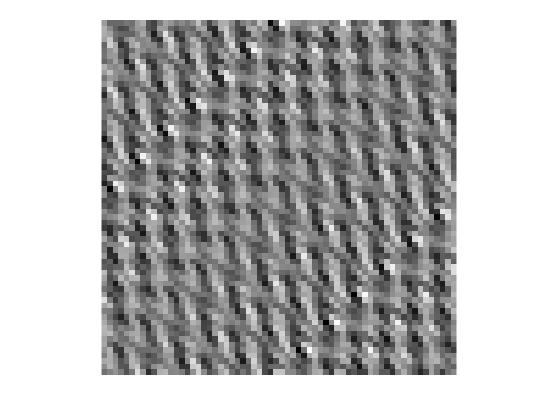

In [12]:
frest1 = deconvwnr(g, PSF);
imshow(pixeldup(frest1, 8), []);

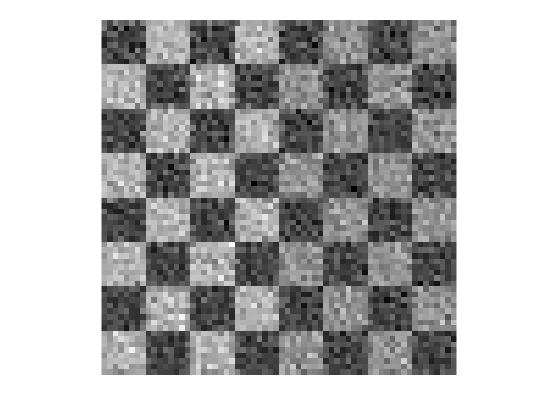

In [13]:
Sn = abs(fft2(noise)) .^ 2;
nA = sum(Sn(:)) / numel(noise);
Sf = abs(fft2(f)) .^ 2;
fA = sum(Sf(:)) / numel(f);
R = nA / fA;

frest2 = deconvwnr(g, PSF, R);
imshow(pixeldup(frest2, 8), []);

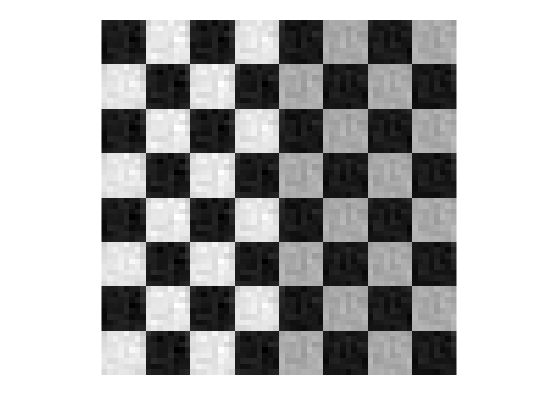

In [14]:
NCORR = fftshift(real(ifft2(Sn)));
ICORR = fftshift(real(ifft2(Sf)));
frest3 = deconvwnr(g, PSF, NCORR, ICORR);
imshow(pixeldup(frest3, 8), []);